# Project: Wrangling and Analyze Data

## Data Gathering
On this section I am going t gather data from different sources.

In [132]:
import pandas as pd
import requests
import requests
import os
import functools
import tweepy
import numpy as np
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

1. Directly downloading the CSV file from the Internet

In [133]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [134]:
#creating a new folder

new_folder= 'image_prediction'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

In [135]:
#Downloading tweet image predictions TSV file using the requests library and write it to image_predictions.tsv

URL='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)

#create file

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

#creating the data frame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
#checking if the request is successful

response

<Response [200]>

In [136]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [137]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hi'
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [138]:
tweets_list=[]

# Reading the .txt file line by line into a list of dictionaries

for line in open('tweet-json.txt', 'r'):
    tweets_data = json.loads(line)
    tweets_list.append({'tweet_id': tweets_data['id_str'],
                        'retweet_count': tweets_data['retweet_count'],
                        'favorite_count': tweets_data['favorite_count'],
                        'followers_count': tweets_data['user']['followers_count']})
    

In [139]:
# Convert the list of dictionaries to a pandas DataFrame
tweets_data = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [140]:
tweets_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. using **both** visual assessment and
programmatic assessement to assess the data.


#### tweet-Archive

In [141]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [142]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [143]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [144]:
df_archive.in_reply_to_status_id.nunique()

77

In [145]:
sum(df_archive.duplicated())

0

In [146]:
df_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [147]:
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [148]:
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [149]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [150]:
df_archive.name.values

array(['Phineas', 'Tilly', 'Archie', ..., 'a', 'a', 'None'], dtype=object)

In [151]:
df_archive.text.unique()

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'], dtype=object)

In [152]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
601,798665375516884993,NaN,NaN,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
1364,702899151802126337,NaN,NaN,2016-02-25 16:53:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Luna. Her tongue is malfunctionin...,NaN,NaN,NaN,https://vine.co/v/i6iIrBwnTFI,12,10,Luna,None,None,None,None


#### image_prediction

In [153]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
716,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,schipperke,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,0.016191,True
1004,708845821941387268,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1,schipperke,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True
322,671866342182637568,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1,Labrador_retriever,0.875614,True,Chihuahua,0.032182,True,golden_retriever,0.017232,True
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True


In [154]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [155]:
image_prediction[image_prediction.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [156]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Tweeter API

In [157]:
tweets_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [158]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [159]:
tweets_data.followers_count.nunique()

66

In [160]:
sum(tweets_data.duplicated())

0

> ### Quality issues

### Twitter-archive 

  1. Presence of unwanted data about retweets,namely retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp.  
  2. name has values that are the string "None" instead of NaN
  3. inaccurate names,possible because of the error while they were being collected. for example,an,a,very etc.
  4. ``timestamp`` column is in 'object' datatype instead of datetime datatype 
  5. 'texts' contains url at the end of the lines.
  6. Undesired columns,namely ``in_reply_to_status_id``,``in_reply_to_user_id``and ``source``. 

### Image_predictions
  7. Undesired columns(img_nm and jpg_url) 
### tweets_data from API
  8. tweet_id is in 'string' datatype



>### Tidiness issues

  1. doggo, floofer, pupper and puppo columns in twitter_archive table can be merged into one column named "dog_stage".

  2. Image_predictions and tweets_data from API tables should be added to twitter archive table to make one master dataframe 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [161]:
# Make copies of original pieces of data
archive_clean=df_archive.copy()
predictions_clean=image_prediction.copy()
tweets_clean=tweets_data.copy()

**Quality**
### Issue #1:
**Presence of unwanted data about retweets.

#### Define:
fixing the rows that contains retweets data from tweeter-archive table as they are not of interest in our analysis. and also there is a lot of missing data from them.

#### Code

In [162]:
#fixing rows
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()] 
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]


#### Test

In [163]:
archive_clean.retweeted_status_id.unique()

array([ nan])

In [164]:
archive_clean.retweeted_status_user_id.unique()

array([ nan])

In [165]:
archive_clean.retweeted_status_timestamp.unique()

array([nan], dtype=object)

**Quality**
### issue#2&3:

  * **name has values that are the string "None" instead of NaN**
  * **inaccurate names,possible because of the error while they were being collected. for example,an,a,very etc.**

#### Define
  * Replace all names that start with a lowercase letter with a NaN
  * Replace all 'None's with a NaN

#### Code

In [166]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in archive_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [167]:
# Replace all names that start with a lowercase letter with a NaN
archive_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
archive_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

#### Test

In [168]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


**Tidiness**
### Issue #1:
**doggo, floofer, pupper and puppo columns in twitter_archive table can be merged into one column named "dog_stage".**

#### Define
Extract the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop the original columns 

#### Code

In [169]:
archive_clean['dog_stage']=archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_clean.dog_stage.value_counts()
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [170]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
dog_stage                     364 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


In [171]:
archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

**Quality**

### issue#4:
**``timestamp`` column is in 'object' datatype instead of datetime datatype**

#### Define
converting timestamp column to datetime

**code**

In [172]:
#convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

**Test**

In [173]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
dog_stage                     364 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 254.9+ KB


In [174]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue#5:
'texts' contains url at the end of the lines.

#### Define

Remove shortened URL from the end of the "text" column.

#### Code

In [175]:
# Find the legnth of URLs
length= len(archive_clean["text"].iloc[0].split()[-1])+1
length

# Remove the length of URLs from text entries
archive_clean["text"]=archive_clean["text"].apply(lambda row: row[:-length])

#### Test

In [176]:
archive_clean.text.unique()

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet'], dtype=object)

### Issue#6&7:
**Undesired columns**

#### Define 
Drop undesired columns

#### Code

In [177]:
# Drop undesired columns

archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'], axis=1, inplace=True)


In [178]:
# from image_prediction
predictions_clean.drop(['img_num','jpg_url'],axis=1,inplace=True)


#### Test

In [179]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
dog_stage             364 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB


### issue#8:

  **tweet_id is in string datatype**

#### define
converting tweet_id from int to 'object' datatype

#### code

In [180]:
#converting tweet_id from string to int

archive_clean.tweet_id=archive_clean.tweet_id.astype(str)
predictions_clean.tweet_id=predictions_clean.tweet_id.astype(str)

#### Test

In [181]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
dog_stage             364 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


#### Tideness

### Issue#2:
**Image_predictions and tweets_data from API tables should be be combined with twitter archive table to make one master dataframe.**

#### Define

Merging Image_predictions and tweets_data from API tables to twitter archive table to make one master dataframe.

#### code

In [182]:
tweeter_master=pd.merge(archive_clean, predictions_clean, on='tweet_id')

In [183]:
tweeter_master=pd.merge(tweeter_master, tweets_clean, on='tweet_id')

In [184]:
tweeter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,orange,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889


#### Test

In [185]:
tweeter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
dog_stage             326 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-nu

In [186]:
tweeter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,orange,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [187]:
tweeter_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**Questions of interest:**  
1.What is the most retweeted tweet by year.  
2.What is the most popular dog name?  
3.Which is the most favorite dog?


### Q1.: Most retweeted tweet by Year.

In [188]:
tweeter_master.loc[tweeter_master.retweet_count.idxmax()]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         doggo
p1                                                   Labrador_retriever
p1_conf                                                        0.825333
p1_dog                                                             True
p2                                                             ice_bear
p2_conf                                                       0.

In [189]:
# Grouping by year
grouped_by_year= tweeter_master.groupby(tweeter_master.timestamp.dt.year)


### Q2.: 10 Most popular dog names


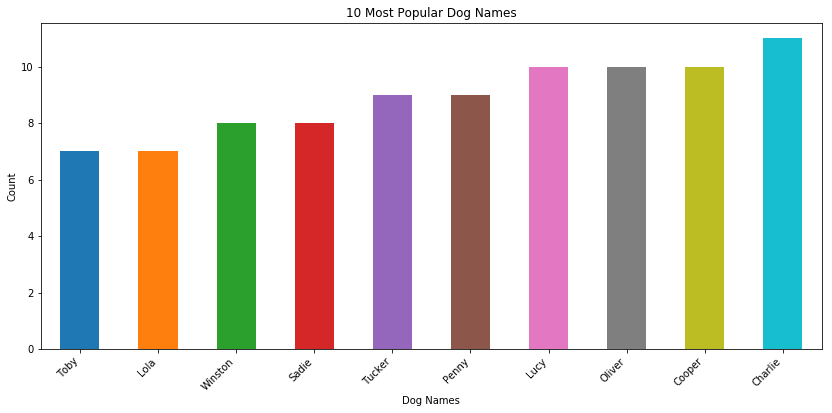

In [190]:
# filter dataset for entries with dog names only
dogs_with_name = tweeter_master[tweeter_master.name.notna()]

# Drawing the plot for 10 most frequent names
most_frequent = dogs_with_name.name.value_counts(ascending=True)[-10:]

plt.figure(figsize=(14, 6))
most_frequent.plot(kind='bar')
plt.title("10 Most Popular Dog Names")
plt.xlabel("Dog Names")
plt.ylabel("Count")
plt.xticks(rotation=45, horizontalalignment='right');

### Q3.: Most favorite dog

In [191]:
tweeter_master.loc[tweeter_master.favorite_count.idxmax()]

tweet_id                                             822872901745569793
timestamp                                           2017-01-21 18:26:02
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a super supportive puppo participating ...
expanded_urls         https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         puppo
p1                                                     Lakeland_terrier
p1_conf                                                        0.196015
p1_dog                                                             True
p2                                                   Labrador_retriever
p2_conf                                                        0

### Visualization

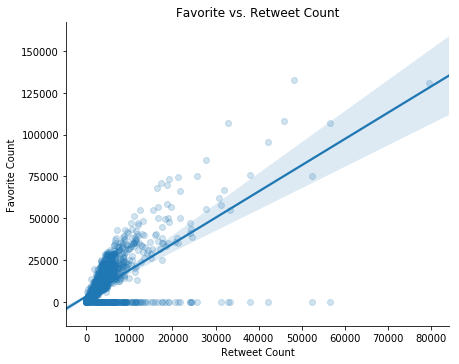

In [192]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=tweets_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

**There is a positive correlation between tweet's favorite count retweet.**

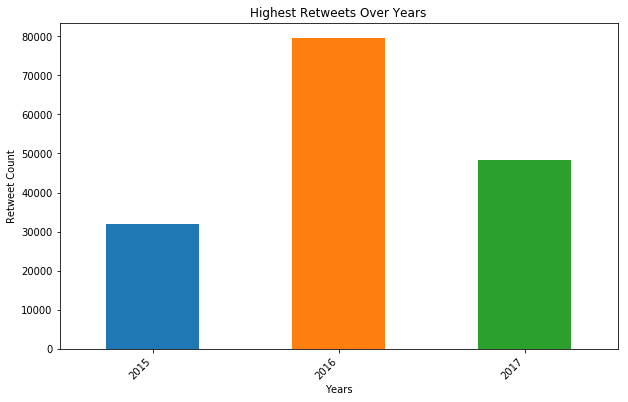

In [193]:
# Most retweets based on year
highest_retweets = grouped_by_year.retweet_count.max()

plt.figure(figsize=(10, 6))
highest_retweets.plot(kind='bar')
plt.title("Highest Retweets Over Years")
plt.xlabel("Years")
plt.ylabel("Retweet Count")
plt.xticks(rotation=45, horizontalalignment='right');


**2016 is the year that recieve most retweets**